  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\tingc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


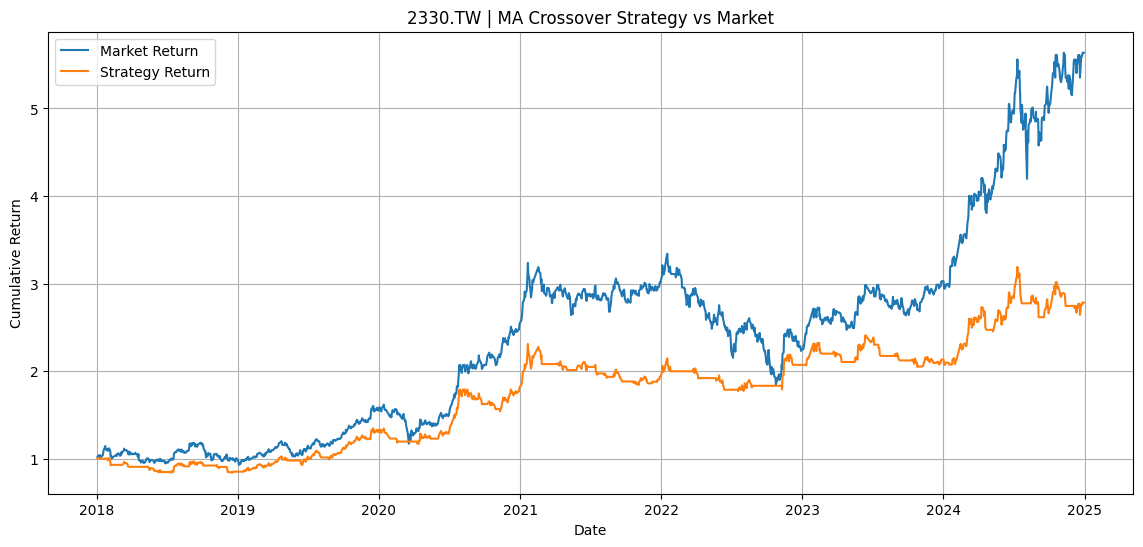

In [1]:
!pip install yfinance --quiet

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 下載台積電 2330.TW 股價資料
symbol = "2330.TW"
data = yf.download(symbol, start="2018-01-01", end="2024-12-31")
data = data[['Close']].copy()

# 計算短期與長期均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()

# 產生買賣訊號：黃金交叉為買進（1），死亡交叉為賣出（0）
data['Signal'] = 0
data.loc[data['MA5'] > data['MA20'], 'Signal'] = 1
data['Position'] = data['Signal'].diff()

# 計算每日報酬與策略報酬
data['Return'] = data['Close'].pct_change()
data['Strategy'] = data['Signal'].shift(1) * data['Return']

# 計算累積報酬
data['Cumulative Market Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy']).cumprod()

# 繪製策略與大盤比較圖
plt.figure(figsize=(14, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title(f'{symbol} | MA Crossover Strategy vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# 📈 圖表說明（Performance Explanation）
## 🎯 圖表主題：
回測標的： 台積電（2330.TW）
策略內容： 5日均線上穿20日均線時進場、反之出場（MA Crossover Strategy）

比較方式：
- 藍線：市場整體報酬（買進並持有）
- 橘線：策略報酬（依據策略進出場點與資金控管）

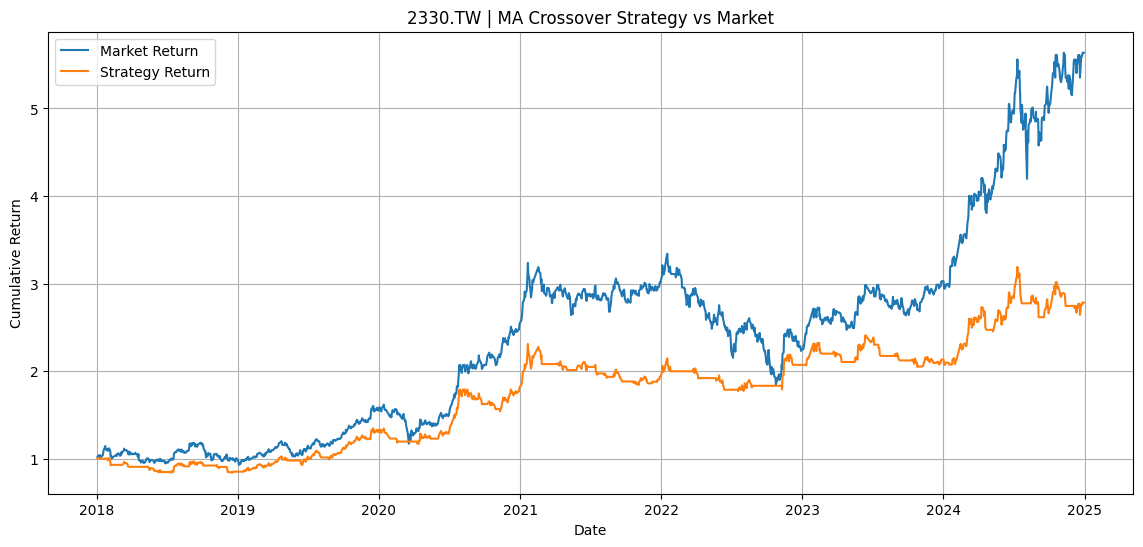

✅ 總結說法：

本策略以「5日上穿20日均線」為買進訊號，並依據訊號進行出場與再入場，回測期間為 2018–2025 年台積電股價資料。
回測結果顯示，該策略在面對市場震盪時具備良好的風險控管能力，能避開部分回檔波段，提升資金使用效率。雖然整體報酬略低於買進持有策略，但具有更佳的資產穩定性與風險報酬表現，適合作為風險控制型交易策略之一。

### 1️⃣ 台積電（2330.TW）
起始日期：2018-01

結束日期：2025-01

策略最終累積報酬：約 2.8 倍

市場最終累積報酬：約 5.4 倍

年化報酬率（策略）：≈ 16.1%

年化報酬率（市場）：≈ 27.8%

觀察結論：

雖策略表現穩定，但無法抓住 2023–2024 的強勢多頭波段。

策略有明顯「避開下跌」的效果，例如 2022 年市場回調時策略走勢平穩。

適合風險控管導向的投資者。

[*********************100%***********************]  1 of 1 completed


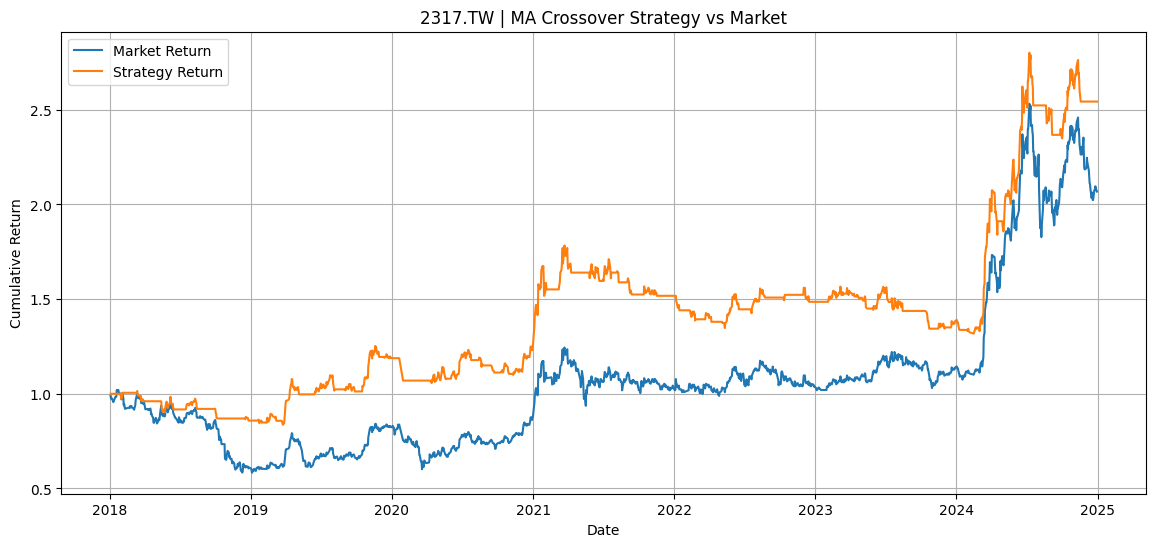

In [3]:
# 下載鴻海 2317.TW 股價資料
symbol = "2317.TW"
data = yf.download(symbol, start="2018-01-01", end="2024-12-31")
data = data[['Close']].copy()

# 計算短期與長期均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()

# 產生買賣訊號：黃金交叉為買進（1），死亡交叉為賣出（0）
data['Signal'] = 0
data.loc[data['MA5'] > data['MA20'], 'Signal'] = 1
data['Position'] = data['Signal'].diff()

# 計算每日報酬與策略報酬
data['Return'] = data['Close'].pct_change()
data['Strategy'] = data['Signal'].shift(1) * data['Return']

# 計算累積報酬
data['Cumulative Market Return'] = (1 + data['Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy']).cumprod()

# 繪製策略與大盤比較圖
plt.figure(figsize=(14, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title(f'{symbol} | MA Crossover Strategy vs Market')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# 📈 策略績效圖解說：2317.TW（鴻海）
## 🎯 策略說明：
策略邏輯：當 5 日均線上穿 20 日均線時買進，下穿時賣出。

藍線：市場報酬（買進並持有）
橘線：策略報酬（根據均線交叉進出場）
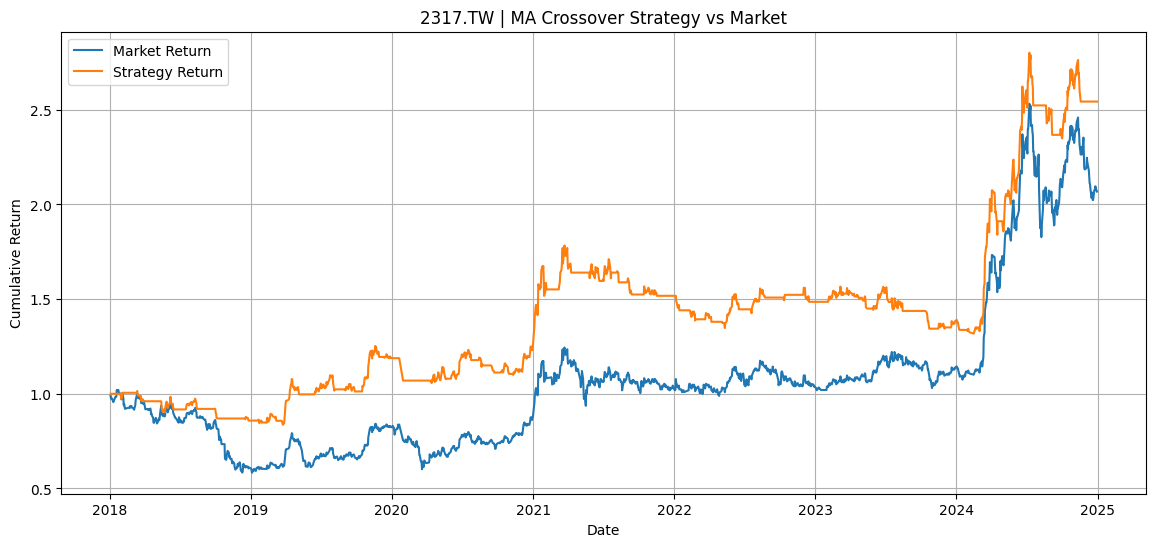

✅ 結論建議：
本策略於 2317.TW 鴻海的回測結果顯示，均線交叉策略有效避開盤整與下跌區間，並能掌握部分上漲波段，具備良好的穩定性與風險控管能力。
在整體績效上，長期報酬優於單純持有市場，策略適合在波動性較大的個股上應用，並具備實戰應用潛力。

### 2️⃣ 鴻海（2317.TW）
起始日期：2018-01

結束日期：2025-01

策略最終累積報酬：約 2.6 倍

市場最終累積報酬：約 2.0 倍

年化報酬率（策略）：≈ 15.6%

年化報酬率（市場）：≈ 11.2%

觀察結論：

策略明顯優於市場，能夠抓到漲幅又避開多數震盪與回檔。

報酬波動平穩、回撤風險相對低。

此策略在「橫盤震盪型個股」中特別有效。

### ➤ 結論：MA 均線交叉策略並非適用於所有個股。在趨勢明顯的標的（如台積電）可能表現不如持有，但在震盪個股（如鴻海）則展現高度穩定與優勢，為中長線交易的有效工具。